<a href="https://colab.research.google.com/github/MichaelTriesCoding/Assignments/blob/main/FinalProjectCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install meteostat

In [ ]:
import numpy as np
from datetime import datetime
from meteostat import Point, Daily, Hourly
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split

          tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt    pres  tsun
time                                                                   
1|2022    20.5  18.3  25.6   3.3   0.0  211.0  21.6   NaN  1010.2   NaN
2|2022    19.8  15.0  21.7  12.7   0.0  206.0  18.4   NaN  1008.8   NaN
3|2022    10.7  -1.0  15.0  45.5   0.0    3.0  22.0   NaN  1014.1   NaN
4|2022     2.7  -2.1   7.8   0.0   0.0   98.0  10.8   NaN  1028.3   NaN
5|2022     7.6   3.3  15.6   0.0   0.0  247.0   9.4   NaN  1016.8   NaN
...        ...   ...   ...   ...   ...    ...   ...   ...     ...   ...
361|2022   2.8  -2.1   9.4   0.0   0.0  344.0   3.2   NaN  1025.5   NaN
362|2022   4.1  -4.9  12.8   0.0   0.0  191.0   6.5   NaN  1027.1   NaN
363|2022   6.9  -2.7  17.8   0.0   0.0  242.0   6.1   NaN  1028.5   NaN
364|2022   9.4   1.1  15.0   0.0   0.0   10.0   6.1   NaN  1025.0   NaN
365|2022  12.7  11.1  15.0   9.1   0.0  220.0   7.6   NaN  1016.3   NaN

[365 rows x 10 columns]


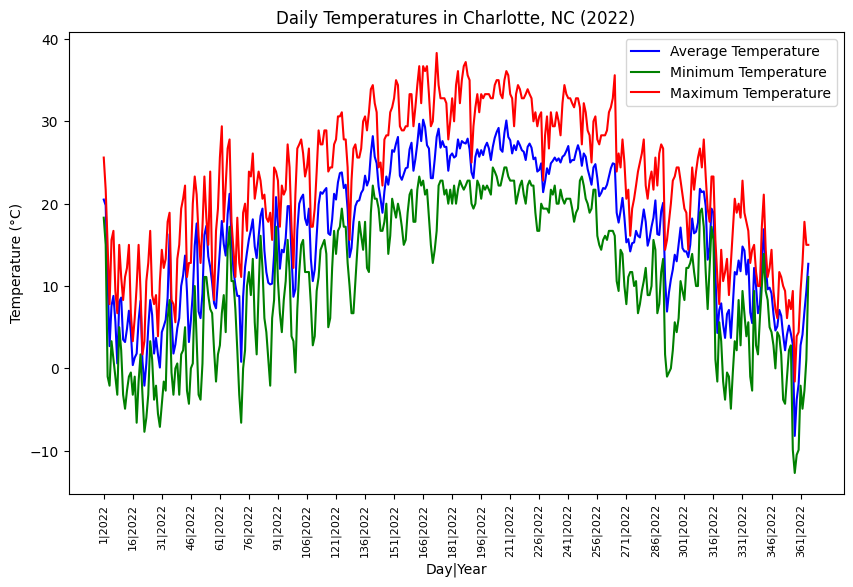

In [ ]:
# Set time period for 2022
start_2022 = datetime(2022, 1, 1)
end_2022 = datetime(2022, 12, 31)

# Create Point for location (Charlotte, NC)
location = Point(35.2271, -80.8431)

# Get daily data for 2022
data_2022 = Daily(location, start_2022, end_2022)
data_2022 = data_2022.fetch()

# Format the index to "day|year"
data_2022.index = data_2022.index.strftime('%-j|%Y')

# Convert to NumPy array
data_array_2022 = data_2022.to_numpy()

# Print data as a table
print(data_2022)

# Plotting the data for 2022
plt.figure(figsize=(10, 6))

# Plot average temperature
plt.plot(data_2022.index, data_2022['tavg'], label='Average Temperature', color='blue')

# Plot minimum temperature
plt.plot(data_2022.index, data_2022['tmin'], label='Minimum Temperature', color='green')

# Plot maximum temperature
plt.plot(data_2022.index, data_2022['tmax'], label='Maximum Temperature', color='red')

# Set x-axis ticks to be in increments of 30 days
ticks = np.arange(0, len(data_2022.index), 15)
plt.xticks(ticks, data_2022.index[ticks], rotation=90, fontsize=8)

# Add titles and labels
plt.title('Daily Temperatures in Charlotte, NC (2022)')
plt.xlabel('Day|Year')
plt.ylabel('Temperature (°C)')
plt.legend()

# Show the plot
plt.show()

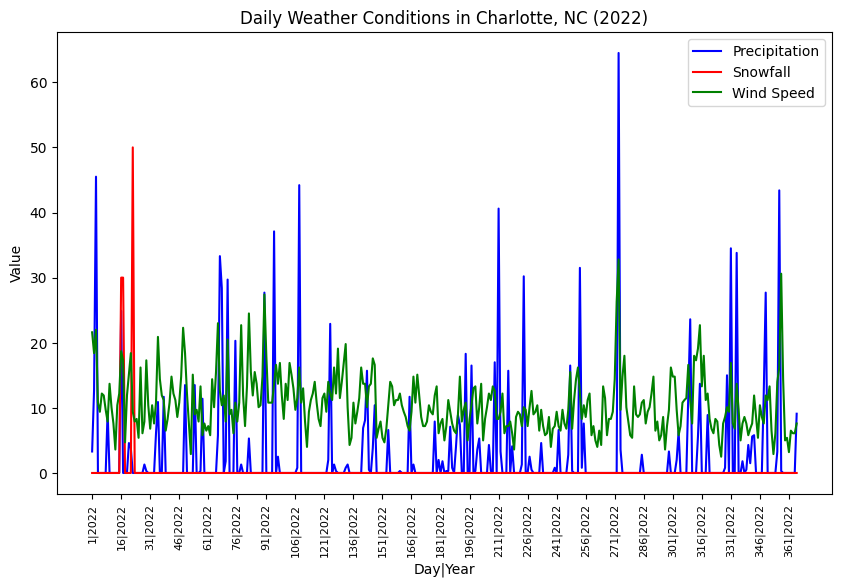

In [ ]:
# Plotting the data for 2022
plt.figure(figsize=(10, 6))

plt.plot(data_2022.index, data_2022['prcp'], label='Precipitation',color='blue')
plt.plot(data_2022.index, data_2022['snow'], label='Snowfall',color='red')
plt.plot(data_2022.index, data_2022['wspd'], label='Wind Speed',color='green')
#plt.plot(data_2022.index, data_2022['pres'], label='Pressure',color='yellow')
#plt.plot(data_2022.index, data_2022['wdir'], label='Wind Direction',color='purple')

# Set x-axis ticks to be in increments of 30 days
ticks = np.arange(0, len(data_2022.index), 15)
plt.xticks(ticks, data_2022.index[ticks], rotation=90, fontsize=8)

plt.title('Daily Weather Conditions in Charlotte, NC (2022)')
plt.xlabel('Day|Year')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
def AverageHumidity(location,start_date,end_date):
  data_set = Hourly(location,start_date,end_date)
  data_set = data_set.fetch()
  data_set = data_set[['rhum']].fillna(0)

  daily_avg_humidity = data_set.resample('D').mean()

  return daily_avg_humidity

In [ ]:
# Training and validation
# Set time period for 2022
start = datetime(2022, 1, 1)
end = datetime(2022, 12, 31)

test_date = datetime(2024,8,5)

# Create Point for location (Charlotte, NC)
location = Point(35.2271, -80.8431)

# Get daily data for 2022
data = Daily(location, start, end)
data = data.fetch()

data_rhum = AverageHumidity(location,start,end)
data = data.join(data_rhum)

labels1 = ['tmin', 'tmax', 'prcp', 'snow', 'wspd', 'pres', 'rhum']
#labels2 = ['tmin', 'tmax', 'snow', 'wspd', 'pres', 'rhum']   # Labels for precipitation model

# Prepare features and target
features1 = data[labels1].fillna(0)
#features2 = data[labels2].fillna(0)      # Feature set for precipitation model
target1 = data[['tavg']].fillna(0)
#target2 = data[['prcp']].fillna(0)       # Target set for precipitation model

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

def Training_Loop_1(X_train,X_val,Y_train,Y_val,n_epoch,model):
  train_loss_history = np.zeros((n_epoch))
  valid_loss_history = np.zeros((n_epoch))

  train_score_history = np.zeros((n_epoch))
  valid_score_history = np.zeros((n_epoch))

  # Train the model
  for epoch in range(n_epoch):
    model.partial_fit(X_train,Y_train)

    # Predict on the validation set
    Y_pred_train = model.predict(X_train)
    Y_pred_valid = model.predict(X_val)

    # Calculate validation error
    mse_train = mean_squared_error(Y_train,Y_pred_train)
    mse_valid = mean_squared_error(Y_val,Y_pred_valid)

    train_loss_history[epoch] = mse_train
    valid_loss_history[epoch] = mse_valid

    # Calculate performance score
    score_train = model.score(X_train,Y_train)
    score_valid = model.score(X_val,Y_val)

    train_score_history[epoch] = score_train
    valid_score_history[epoch] = score_valid

  return model, train_loss_history, valid_loss_history, train_score_history, valid_score_history

def PlotLossHistory(n_epoch,train_loss_history,valid_loss_history,label):
  plt.figure(figsize=(10, 6))
  plt.plot(range(n_epoch), train_loss_history, label='Training Loss')
  plt.plot(range(n_epoch), valid_loss_history, label='Validation Loss')
  plt.title(f'Training and Validation Loss For {label}')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

def PlotPerformance(n_epoch,train_score_history,valid_score_history,label):
  plt.figure(figsize=(10, 6))
  plt.plot(range(n_epoch), train_score_history, label='Training Score')
  plt.plot(range(n_epoch), valid_score_history, label='Validation Score')
  plt.title(f'Training and Validation Score For {label}')
  plt.xlabel('Epoch')
  plt.ylabel('R2 Score')
  plt.legend()
  plt.show()

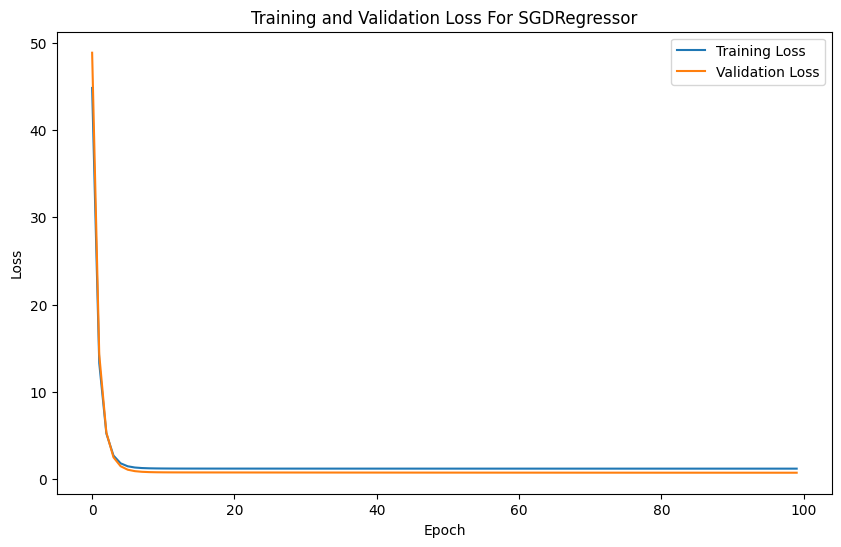

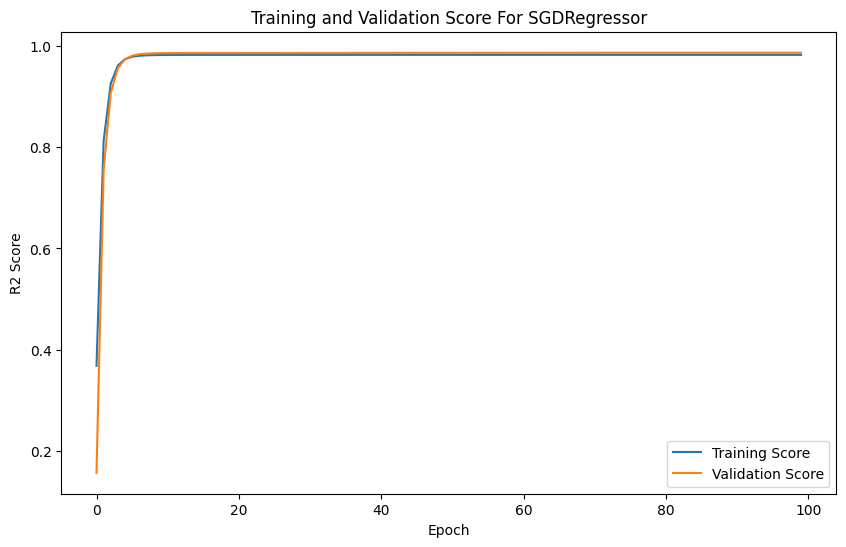

In [ ]:
# Model 1: Temperature
# Split the data into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(features1, target1, test_size=0.2, random_state=0)
Y_train = Y_train.values.ravel()
Y_val = Y_val.values.ravel()

sc_X_tavg = StandardScaler()
X_train = sc_X_tavg.fit_transform(X_train)
X_val = sc_X_tavg.transform(X_val)

n_epoch = 100
model_tavg = SGDRegressor(warm_start=True,random_state=0)
model_tavg, train_loss_history, valid_loss_history, train_score_history, valid_score_history = Training_Loop_1(X_train,X_val,Y_train,Y_val,n_epoch,model_tavg)

PlotLossHistory(n_epoch,train_loss_history,valid_loss_history,'SGDRegressor')
PlotPerformance(n_epoch,train_score_history,valid_score_history,'SGDRegressor')

# # Model 2: Precipitation
# # Split the data into training and validation sets
# X_train, X_val, Y_train, Y_val = train_test_split(features2, target2, test_size=0.2, random_state=0)

# sc_X_prcp = StandardScaler()
# X_train = sc_X_prcp.fit_transform(X_train)
# X_val = sc_X_prcp.transform(X_val)

# model_prcp = SGDRegressor(warm_start=True,random_state=0)
# train_loss_history = np.zeros((n_epoch))
# valid_loss_history = np.zeros((n_epoch))
# model_prcp, train_loss_history, valid_loss_history = Training_Loop_1(X_train,X_val,Y_train,Y_val,n_epoch,model_prcp)

# PlotLossHistory(n_epoch,train_loss_history,valid_loss_history)

In [ ]:
test_model = model_tavg
test_scaler = sc_X_tavg

# Model 1: Avg Temperature
test_start = test_date
test_end = test_start
test = Daily(location, test_start, test_end)
test = test.fetch()

test_rhum = AverageHumidity(location,test_start,test_end)
test = test.join(test_rhum)

test_features = test[labels1].fillna(0)
test_features = test_scaler.transform(test_features)
test_prediction = test_model.predict(test_features)

test_mse = mean_squared_error(test[['tavg']].values[0], test_prediction)
print("Predicted Average Temp = ", test_prediction[0])
print("Actual Average Temp = ", test[['tavg']].values[0,0])
print("MSE = ", test_mse)
print("Percent Error = ", 100.0*np.abs((test_prediction[0]-test[['tavg']].values[0,0])/test[['tavg']].values[0,0]))

Predicted Average Temp =  26.634442986226524
Actual Average Temp =  24.6
MSE =  4.138958264206292
Percent Error =  8.270093439945216


In [ ]:
import torch as torch
import torch.nn as nn

# Model 2: Temperature
# Split the data into training and validation sets

# Convert data to proper type

t_u = features1.values.astype(float)
t_c = target1.values.astype(float)

t_u = torch.tensor(t_u, dtype=torch.float32)
t_c = torch.tensor(t_c, dtype=torch.float32)

n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

sc_X_tavg2 = StandardScaler()
t_un_train = sc_X_tavg2.fit_transform(t_u_train)
t_un_val = sc_X_tavg2.transform(t_u_val)

t_un_train = torch.tensor(t_un_train, dtype=torch.float32)
t_un_val = torch.tensor(t_un_val, dtype=torch.float32)

# t_cn_train = scaler.fit_transform(t_c_train.reshape(-1, 1))
# t_cn_val = scaler.transform(t_c_val.reshape(-1, 1))

# t_cn_train = torch.tensor(t_cn_train, dtype=torch.float32)
# t_cn_val = torch.tensor(t_cn_val, dtype=torch.float32)

# t_cn_train = t_cn_train.view(-1, 1)
# t_cn_val = t_cn_val.view(-1, 1)

print(t_un_train.shape)
print(t_c_train.shape)
print(t_un_val.shape)
print(t_c_val.shape)

torch.Size([292, 7])
torch.Size([292, 1])
torch.Size([73, 7])
torch.Size([73, 1])


In [ ]:
def R2_Score(y_true, y_pred):
    total_sum_of_squares = torch.sum((y_true - y_true.mean())**2)
    residual_sum_of_squares = torch.sum((y_true - y_pred)**2)
    r2 = 1 - (residual_sum_of_squares / total_sum_of_squares)
    return r2

def Training_Loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val,
                   t_c_train, t_c_val):
  train_loss_history = np.zeros((n_epochs))
  valid_loss_history = np.zeros((n_epochs))
  train_score_history = np.zeros((n_epochs))
  valid_score_history = np.zeros((n_epochs))

  for epoch in range(1, n_epochs + 1):
    t_p_train = model(t_u_train)
    loss_train = loss_fn(t_p_train, t_c_train)

    t_p_val = model(t_u_val)
    loss_val = loss_fn(t_p_val, t_c_val)

    train_loss_history[epoch-1] = loss_train.item()
    valid_loss_history[epoch-1] = loss_val.item()

    train_score_history[epoch-1] = R2_Score(t_c_train, t_p_train)
    valid_score_history[epoch-1] = R2_Score(t_c_val, t_p_val)

    optimizer.zero_grad()
    loss_train.backward()
    optimizer.step()

    if epoch == 1 or epoch % 1000 == 0:
      print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
            f" Validation loss {loss_val.item():.4f}")

  return train_loss_history, valid_loss_history, train_score_history, valid_score_history

Epoch 1, Training loss 346.8456, Validation loss 335.3814
Epoch 1000, Training loss 6.8727, Validation loss 7.7315
Epoch 2000, Training loss 1.3312, Validation loss 1.2856
Epoch 3000, Training loss 1.1882, Validation loss 1.0941
Epoch 4000, Training loss 1.1777, Validation loss 1.0795
Epoch 5000, Training loss 1.1744, Validation loss 1.0712


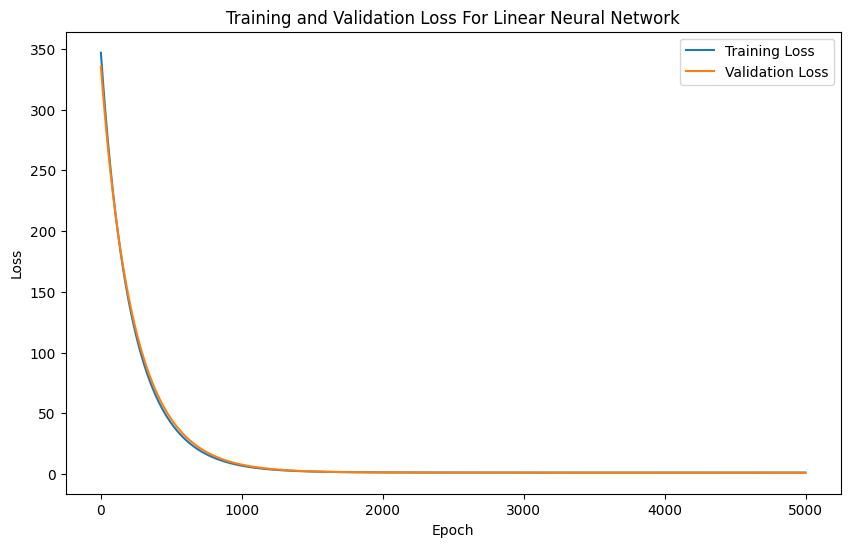

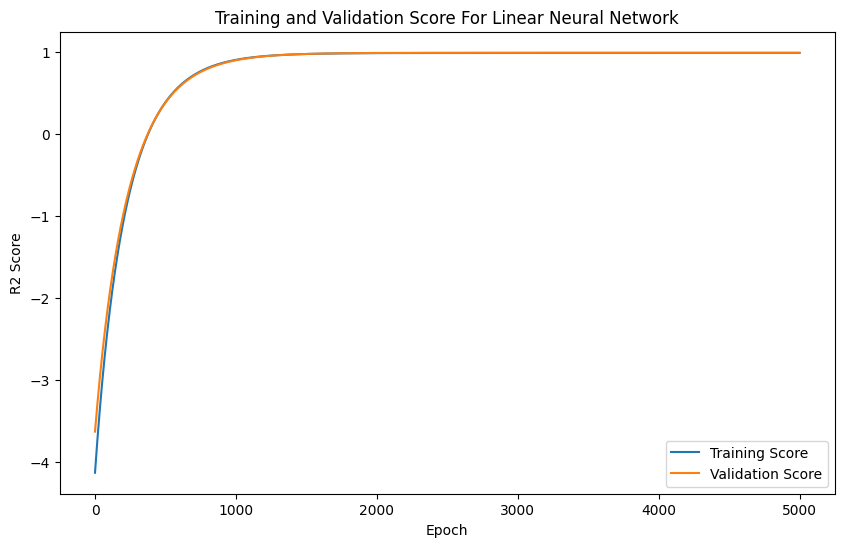

In [ ]:
model_tavg2 = nn.Linear(t_u.shape[1], 1)
optimizer = torch.optim.SGD(model_tavg2.parameters(), lr=1e-3)

n_epoch = 5000
train_loss_history, valid_loss_history, train_score_history, valid_score_history = Training_Loop(
    n_epochs = n_epoch,
    optimizer = optimizer,
    model = model_tavg2,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val)

PlotLossHistory(n_epoch,train_loss_history,valid_loss_history,'Linear Neural Network')
PlotPerformance(n_epoch,train_score_history,valid_score_history,'Linear Neural Network')

In [ ]:
test_model = model_tavg2
test_scaler = sc_X_tavg2

# Model 2: Avg Temperature
test_start = test_date
test_end = test_start
test = Daily(location, test_start, test_end)
test = test.fetch()

test_rhum = AverageHumidity(location,test_start,test_end)
test = test.join(test_rhum)

test_features = test[labels1].fillna(0)

test_t_u = test_features.values.astype(float)
test_t_u = torch.tensor(test_t_u, dtype=torch.float32)

test_t_un = test_scaler.transform(test_t_u)
test_t_un = torch.tensor(test_t_un, dtype=torch.float32)

test_tavg = torch.tensor(test[['tavg']].values.astype(float), dtype=torch.float32)

test_prediction = test_model(test_t_un)

test_mse = nn.MSELoss()(test_tavg, test_prediction)
print("Predicted Average Temp = ", test_prediction.item())
print("Actual Average Temp = ", test_tavg.item())
print("MSE = ", test_mse.item())
print("Percent Error = ", 100.0 * torch.abs((test_prediction - test_tavg) / test_tavg).item())

Predicted Average Temp =  18.879993438720703
Actual Average Temp =  19.200000762939453
MSE =  0.10240468382835388
Percent Error =  1.6667047515511513
Predicted Average Temp =  22.764766693115234
Actual Average Temp =  23.899999618530273
MSE =  1.2887537479400635
Percent Error =  4.749928787350655
Predicted Average Temp =  27.489219665527344
Actual Average Temp =  28.700000762939453
MSE =  1.4659909009933472
Percent Error =  4.218749329447746
Predicted Average Temp =  28.101093292236328
Actual Average Temp =  28.299999237060547
MSE =  0.03956357389688492
Percent Error =  0.7028478663414717
Predicted Average Temp =  29.267623901367188
Actual Average Temp =  29.299999237060547
MSE =  0.0010481623467057943
Percent Error =  0.11049603344872594
Predicted Average Temp =  26.072582244873047
Actual Average Temp =  26.200000762939453
MSE =  0.016235478222370148
Percent Error =  0.48633022233843803
Predicted Average Temp =  31.897953033447266
Actual Average Temp =  31.299999237060547
MSE =  0.357

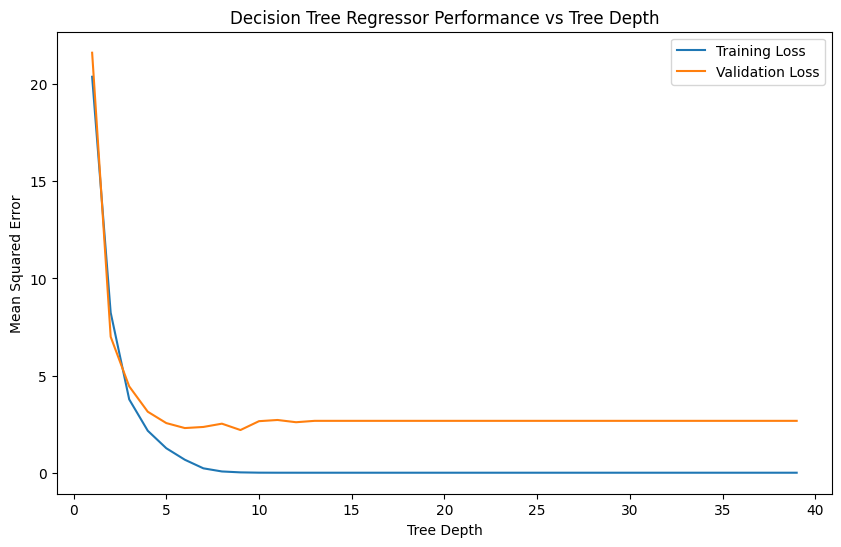

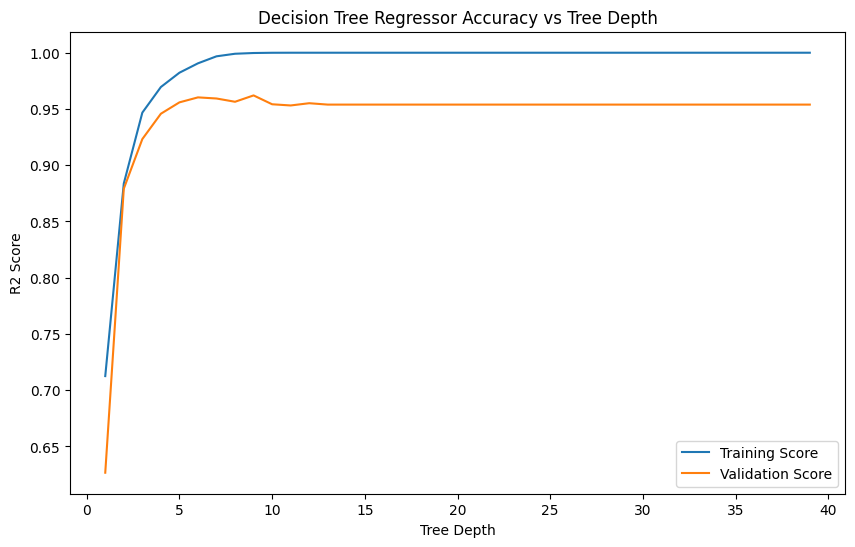

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

# Model 3: Temperature
# Split the data into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(features1, target1, test_size=0.2, random_state=0)
Y_train = Y_train.values.ravel()
Y_val = Y_val.values.ravel()

sc_X_tavg3 = StandardScaler()
X_train = sc_X_tavg3.fit_transform(X_train)
X_val = sc_X_tavg3.transform(X_val)

max_depth_range = range(1,40)
train_loss_history = np.zeros((len(max_depth_range)))
valid_loss_history = np.zeros((len(max_depth_range)))
train_score_history = np.zeros((len(max_depth_range)))
valid_score_history = np.zeros((len(max_depth_range)))
for depth in max_depth_range:
    model_tavg3 = DecisionTreeRegressor(max_depth=depth, random_state=0)
    model_tavg3.fit(X_train, Y_train)

    Y_train_pred = model_tavg3.predict(X_train)
    Y_valid_pred = model_tavg3.predict(X_val)

    train_loss_history[depth-1] = mean_squared_error(Y_train, Y_train_pred)
    valid_loss_history[depth-1] = mean_squared_error(Y_val, Y_valid_pred)

    train_score_history[depth-1] = model_tavg3.score(X_train,Y_train)
    valid_score_history[depth-1] = model_tavg3.score(X_val,Y_val)

plt.figure(figsize=(10, 6))
plt.plot(max_depth_range, train_loss_history, label='Training Loss')
plt.plot(max_depth_range, valid_loss_history, label='Validation Loss')
plt.xlabel('Tree Depth')
plt.ylabel('Mean Squared Error')
plt.title('Decision Tree Regressor Performance vs Tree Depth')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(max_depth_range, train_score_history, label='Training Score')
plt.plot(max_depth_range, valid_score_history, label='Validation Score')
plt.xlabel('Tree Depth')
plt.ylabel('R2 Score')
plt.title('Decision Tree Regressor Accuracy vs Tree Depth')
plt.legend()
plt.show()

In [ ]:
test_model = model_tavg3
test_scaler = sc_X_tavg3

# Model 3: Avg Temperature
test_start = test_date
test_end = test_start
test = Daily(location, test_start, test_end)
test = test.fetch()

test_rhum = AverageHumidity(location,test_start,test_end)
test = test.join(test_rhum)

test_features = test[labels1].fillna(0)
test_features = test_scaler.transform(test_features)
test_prediction = test_model.predict(test_features)

test_mse = mean_squared_error(test[['tavg']].values[0], test_prediction)
print("Predicted Average Temp = ", test_prediction[0])
print("Actual Average Temp = ", test[['tavg']].values[0,0])
print("MSE = ", test_mse)
print("Percent Error = ", 100.0*np.abs((test_prediction[0]-test[['tavg']].values[0,0])/test[['tavg']].values[0,0]))

Predicted Average Temp =  25.9
Actual Average Temp =  24.6
MSE =  1.6899999999999926
Percent Error =  5.284552845528443


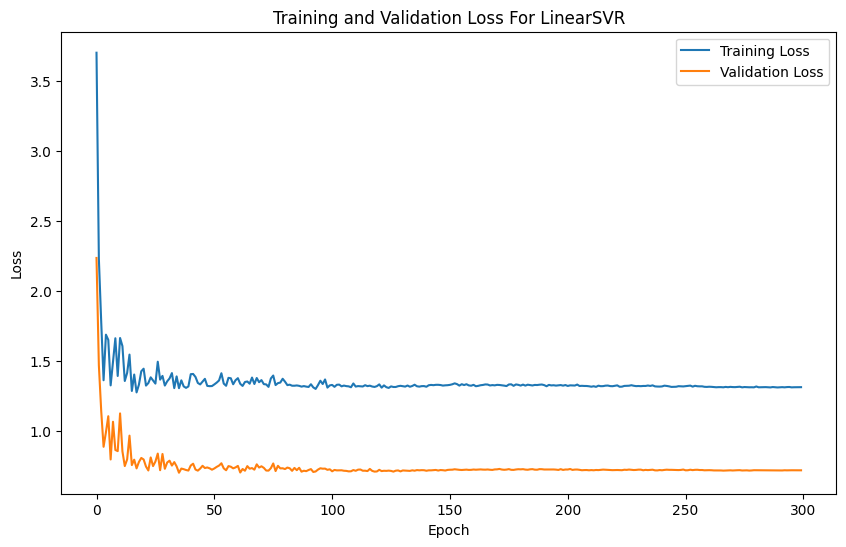

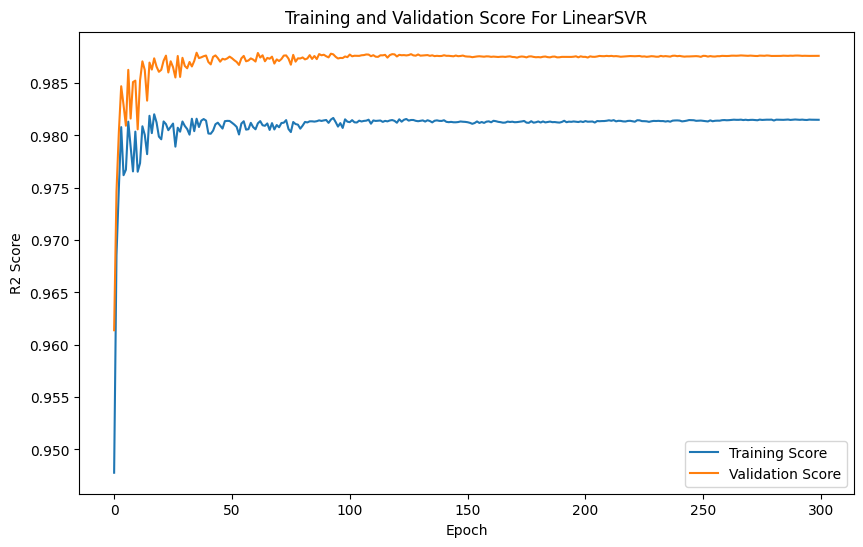

In [ ]:
from sklearn.svm import LinearSVR

# Model 3: Temperature
# Split the data into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(features1, target1, test_size=0.2, random_state=0)
Y_train = Y_train.values.ravel()
Y_val = Y_val.values.ravel()

sc_X_tavg4 = StandardScaler()
X_train = sc_X_tavg4.fit_transform(X_train)
X_val = sc_X_tavg4.transform(X_val)

n_epoch = 300
train_loss_history = np.zeros(n_epoch)
valid_loss_history = np.zeros(n_epoch)
train_score_history = np.zeros(n_epoch)
valid_score_history = np.zeros(n_epoch)
for epoch in range(1,n_epoch+1):
    model_tavg4 = LinearSVR(max_iter=epoch,dual='auto',random_state=0)
    model_tavg4.fit(X_train, Y_train)

    Y_train_pred = model_tavg4.predict(X_train)
    Y_valid_pred = model_tavg4.predict(X_val)

    train_loss_history[epoch-1] = mean_squared_error(Y_train, Y_train_pred)
    valid_loss_history[epoch-1] = mean_squared_error(Y_val, Y_valid_pred)

    train_score_history[epoch-1] = model_tavg4.score(X_train,Y_train)
    valid_score_history[epoch-1] = model_tavg4.score(X_val,Y_val)

PlotLossHistory(n_epoch,train_loss_history,valid_loss_history,'LinearSVR')
PlotPerformance(n_epoch,train_score_history,valid_score_history,'LinearSVR')

In [ ]:
test_model = model_tavg4
test_scaler = sc_X_tavg4

# Model 4: Avg Temperature
test_start = test_date
test_end = test_start
test = Daily(location, test_start, test_end)
test = test.fetch()

test_rhum = AverageHumidity(location,test_start,test_end)
test = test.join(test_rhum)

test_features = test[labels1].fillna(0)
test_features = test_scaler.transform(test_features)
test_prediction = test_model.predict(test_features)

test_mse = mean_squared_error(test[['tavg']].values[0], test_prediction)
print("Predicted Average Temp = ", test_prediction[0])
print("Actual Average Temp = ", test[['tavg']].values[0,0])
print("MSE = ", test_mse)
print("Percent Error = ", 100.0*np.abs((test_prediction[0]-test[['tavg']].values[0,0])/test[['tavg']].values[0,0]))

Predicted Average Temp =  26.711927250504242
Actual Average Temp =  24.6
MSE =  4.460236711422403
Percent Error =  8.585070124000978
